# Multiple variables linear regression

Chúng ta cùng nhau giải quyết bài toán đơn giản 
> y = ax1 + bx2 + c


In [1]:
from sklearn.datasets import make_regression
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
x,y = make_regression(n_samples=1000, n_features=2, noise=5, random_state=42, shuffle=False)
y = y.reshape(y.shape[0],1)

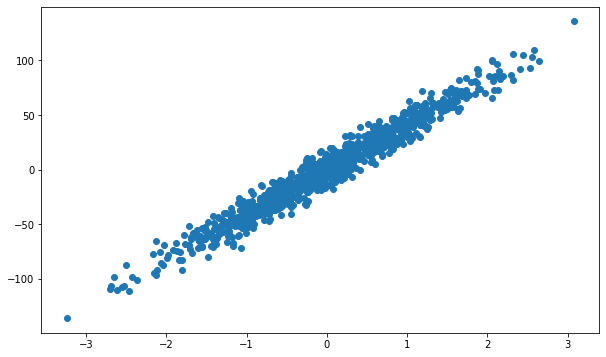

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], y)
plt.show()

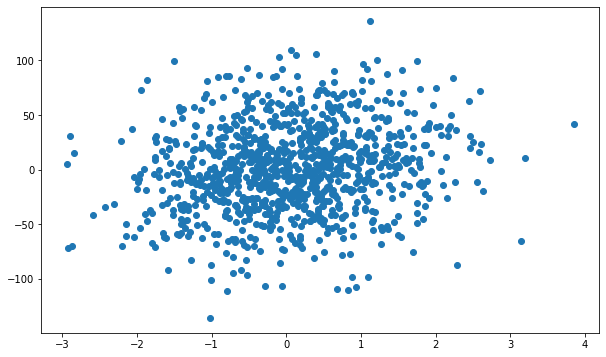

In [4]:
plt.figure(figsize=(10,6))

plt.scatter(x[:,1], y)
plt.show()

In [5]:
one_mt = np.ones(len(x))
one_mt = one_mt.reshape(len(one_mt), 1)
X= np.hstack((x, one_mt))

theta = np.random.randn(3).reshape(3,1)



In [6]:
def model(X,theta):
    return X.dot(theta)

In [9]:
def cost_func( X, y, theta):
    m = X.shape[0]
    return (1/(2*m))* np.sum((model(X, theta) - y)**2)
cost_func( X, y, theta)


768.0343257706674

In [10]:
def gradient(X,y,theta):
    m = X.shape[0]

    return (1/m) * X.T.dot(model(X,theta) - y)

gradient(X,y,theta)
X.T.shape
(model(X,theta)-y).shape

(1000, 1)

In [11]:
def descent_gradient(X,y,theta, learning_rate, n_interactions):
    err = np.zeros(n_interactions)
    for i in range(0, n_interactions):
        theta = theta - learning_rate * gradient(X,y,theta)
        err[i] = cost_func(X,y,theta)
    return theta, err

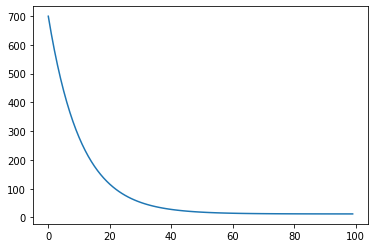

In [12]:
learning_rate =0.05
n_interactions= 100

theta_final,err = descent_gradient(X,y,theta, learning_rate, n_interactions)
plt.plot(np.arange(n_interactions), err)



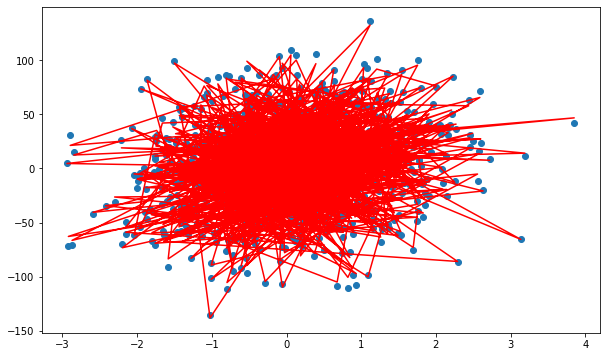

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,1], y)
plt.plot(X[:,1], model(X, theta_final), c='r')
plt.show()
# it's not necessary to plot our target in fonction of each feature, but we can

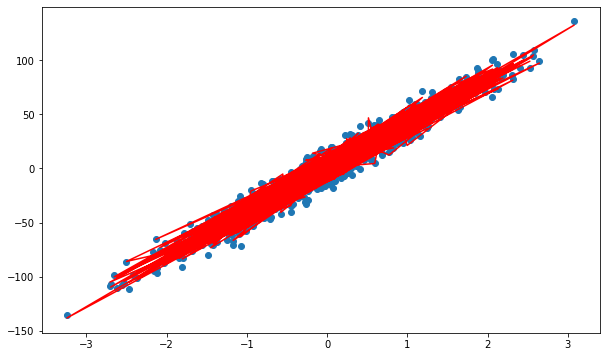

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], y)
plt.plot(X[:,0], model(X, theta_final), c='r')
plt.show()

In [15]:
y_preds = model(X, theta_final)

In [16]:
def r2_score(y_true, y_pred):
    """
    calcul the coefficient of determination 
    """
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
r2_score(y, y_preds)

0.9849431246095265